# **<center>SUICIDE RATE BY COUNTRY FROM 1985-2021</center>**

### **ABOUT THE DATASET**

This dataset cantains comprehensive information about the suicide cases reported from multiple countries around the globe from 1985-2021. It is available on <a href='https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021'> Sucides Rate 1985-2021</a> .It contains information like 

<ul>
<li>Country</li>
<li>Year</li>
<li>Sex</li>
<li>Age</li>
<li>Suicides No</li>
<li>Population</li>
<li>Suicides/100k population</li>
<li>country-year</li>
<li>HDI for year</li>
<li>GDP_for_year ($) </li>
<li>GDP_per_capita ($)</li>
<li>Generation</li>


</ul>


#### **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### **LOADING THE DATASET**

In [71]:
df=pd.read_csv('suicides 1895-2020.csv')


#### **EXPLORATORY DATA ANALYSIS**

In [72]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [73]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation
31755,Uzbekistan,2017,female,75+ years,3.0,32388600,0.009263,Uzbekistan2017,0.691258,62081323299,1916.764642,G.I. Generation


In [74]:
df['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016, 2020,
       2019, 2018, 2017], dtype=int64)

In [75]:
df.drop('country-year',axis=1,inplace=True)

In [77]:
df.shape

(31756, 11)

In [78]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [79]:
df.duplicated().sum()

0

#### **VISUALIZING THE MISSING COLUMN**

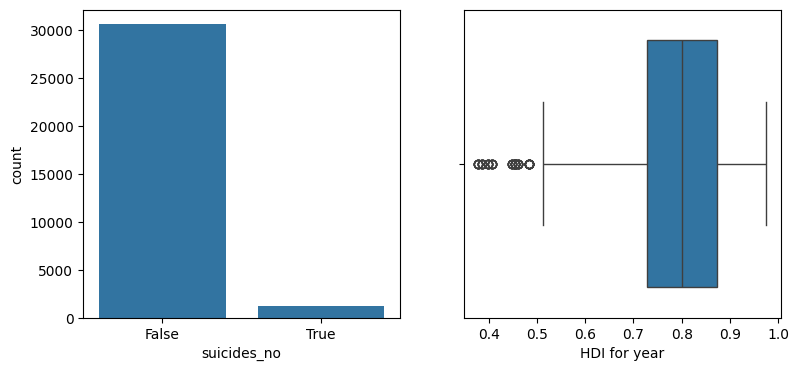

In [80]:
fig,axs=plt.subplots(1,2,figsize=(9,4))
sns.countplot(x=df['suicides_no'].isnull(),ax=axs[0])



sns.boxplot(x='HDI for year',data=df,ax=axs[1])

plt.show()

In [81]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

In [82]:
df['HDI for year'].isna().sum()

19456

#### **DATA IMPUTATION**

In [83]:
imputed_value = df['HDI for year'].median()
print(imputed_value)

imputed_suicides = df['suicides_no'].mean()
print(imputed_suicides)


0.800456703
237.13624165466683


In [84]:
df['HDI for year'].fillna(imputed_value,inplace=True)
df['suicides_no'].fillna(imputed_suicides,inplace=True)

C:\Users\awans\AppData\Local\Temp\ipykernel_11152\3902340664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HDI for year'].fillna(imputed_value,inplace=True)
C:\Users\awans\AppData\Local\Temp\ipykernel_11152\3902340664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [85]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

#### **SAVING CLEANED DATA TO A CSV FILE**

In [86]:
df.to_csv('cleaned suicide 1985-2021.csv')